#**Theoretical Background for Hubble Constant Estimation**

##Generating True Luminosity Distance Data :

The luminosity distance $ D_L $ in a flat universe (for low redshift) is given by:

\begin{equation}
D_L(z) = \frac{c z}{H_0}
\end{equation}

where:


*   $D_L(z)$ is the luminosity distance in megaparsecs (Mpc)
*   $c$ is the speed of light $(3 \times 10^5$ km/s)
*   $z$ is the redshift
*   $H_0$ is the Hubble constant (in km/s/Mpc)

We generate synthetic redshift values uniformly sampled in the range ($ 0.0001 \leq z \leq 0.1 $) and compute the corresponding $ D_L $ values using an assumed true Hubble constant of $ H_0 = 70 $ km/s/Mpc.

##Introducing Measurement Noise :

Real-world astronomical observations are subject to uncertainties. To model these effects, we introduce Gaussian noise into the luminosity distance:

\begin{equation}
D_L^{\text{obs}} = D_L^{\text{true}} + \mathcal{N}(0, \sigma)
\end{equation}

where $ \mathcal{N}(0, \sigma) $ represents a normal distribution with zero mean and standard deviation $ \sigma $. We also ensure all distances remain positive, as negative values are nonphysical.

##Least Squares Fit (Linear Model) :
We assume a linear relationship between luminosity distance and redshift:

\begin{equation}
D_L = a z + b
\end{equation}

Using the Least Squares Method, we determine the coefficients $( a )$ and $( b )$ by minimizing:

\begin{equation}
\chi^2 = \sum_{i} \left( D_{L,i} - (a z_i + b) \right)^2
\end{equation}

where $( D_{L,i} )$ are the observed data points. The estimated Hubble constant is then given by:

\begin{equation}
H_0 = \frac{c}{a}
\end{equation}

where $( c )$ is the speed of light.

##Quadratic Polynomial Fit :
To account for potential deviations from linearity, we fit a second-degree polynomial:

\begin{equation}
D_L = a_0 + a_1 z + a_2 z^2
\end{equation}

We solve for the coefficients $( a_0, a_1, a_2 )$ using the normal equations:

$
\begin{bmatrix}
n & \sum z_i & \sum z_i^2 \\
\sum z_i & \sum z_i^2 & \sum z_i^3 \\
\sum z_i^2 & \sum z_i^3 & \sum z_i^4
\end{bmatrix}
·
\begin{bmatrix}
a_0 \\ a_1 \\ a_2
\end{bmatrix}
=
\begin{bmatrix}
\sum D_{L,i} \\ \sum z_i D_{L,i} \\ \sum z_i^2 D_{L,i}
\end{bmatrix}
$

where $( n )$ is the number of data points. The best-fit polynomial coefficients are used to compute an estimate for $( H_0 )$.



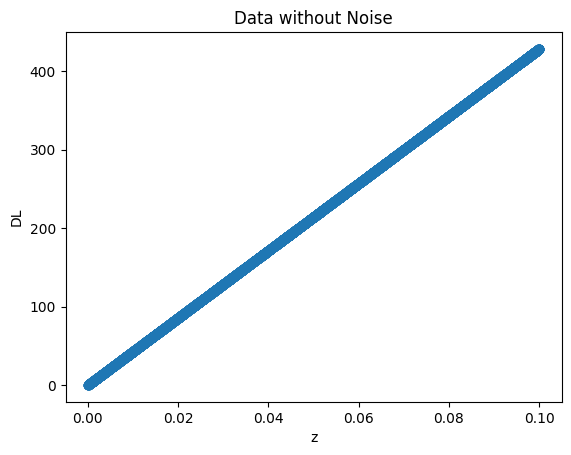

FOR LINEAR FITTING ( LEAST SQUARE METHOD ) : y = ax + b 
Fitted coefficients: a = 4282.749400000004, b = -2.2737367544323206e-13
Value of Chi_min square(L) :  7.872903307789227e-29
Value of H_o(L) :  70.04845999161186  km/s/Mpc


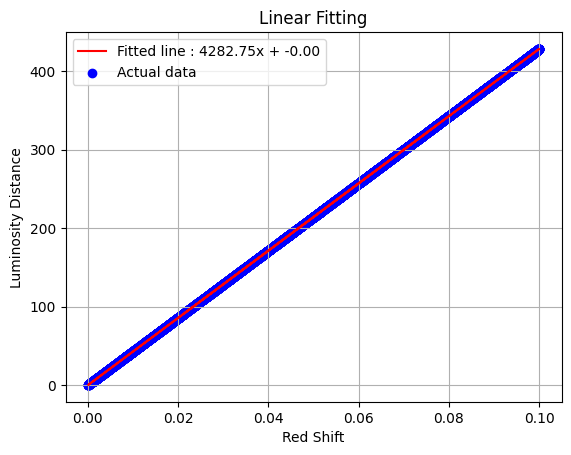


FOR POLYNOMIAL FITTING ( QUADRATIC ) : y = a0 + a1(x) + a2(x^2) 
Fitted coefficients: a0 = -2.7939677238464353e-13, a1 = 4282.749400000017, a2 = -1.6694135580048073e-10
Value of Chi_min square(Q) :  7.530929205577685e-29
Value of H_o(Q) :  70.04845999161209  km/s/Mpc


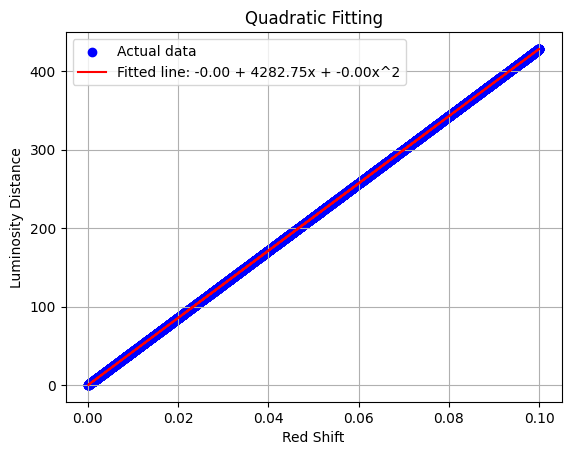

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import astropy.cosmology as cosmo
import astropy.units as unit
import astropy.constants as cons
import h5py

def dl_true_lowz(z, H0):
    return (cons.c.to(unit.km/unit.s).value*z)/H0
N = 10000 #No. of data points
zt = np.random.uniform(0.0001, 0.1, N) #True Redshift points
H0t = 70 #Injected value of True Hubble constant in km/s/Mpc
DLt = dl_true_lowz(zt, H0t) #True distance points in Mpc

plt.scatter(zt, DLt)
plt.xlabel('z')
plt.ylabel('DL')
plt.title('Data without Noise')
plt.show()

#Assignment Portion
def LeastSqFit(x,y):
    print("FOR LINEAR FITTING ( LEAST SQUARE METHOD ) : y = ax + b ")
    n = len(x)
    x_mean = np.sum(x)/(n*1.0)
    y_mean = np.sum(y)/(n*1.0)
    Y = []
    c = 3.0 * (10**5) #km/s
    x_xm2 = 0.0
    xy_xym = 0.0
    for i in range(n):
        x_xm2 = x_xm2 + ((x[i] - x_mean)**2)
        xy_xym = xy_xym + ((x[i] - x_mean)*(y[i] - y_mean))
    a = ((xy_xym))/((x_xm2))
    b = y_mean - (a*x_mean)
    for i in range(n):
        Y.append((a*x[i]) + b)
    print(f"Fitted coefficients: a = {a}, b = {b}")

    E = 0.0
    Ysum = np.sum(Y)
    for i in range(n):
        E = E + ((y[i]-Y[i])**2)
    Chi = E/Ysum # Can try without the division of Ysum
    print("Value of Chi_min square(L) : ",Chi)
    H = (c/a)

    #error bar
    sigma_x = np.sqrt((1.0/(n-1))*np.sum((x-x_mean)**2))
    sigma_y = np.sqrt((1.0/(n-1))*np.sum((y-y_mean)**2))
    sigma_H = H*np.sqrt(((sigma_x/x)**2)+((sigma_y/y)**2))

    print("Value of H_o(L) : ",H," km/s/Mpc")

    plt.plot(x,Y,label=f"Fitted line : {a:.2f}x + {b:.2f}", color="red")
    plt.scatter(x,y,label='Actual data', color="blue")
    plt.xlabel("Red Shift")
    plt.ylabel("Luminosity Distance")
    plt.title("Linear Fitting")
    plt.legend()
    plt.grid()
    plt.show()

def PolyQuadFit(x,y):
    print("FOR POLYNOMIAL FITTING ( QUADRATIC ) : y = a0 + a1(x) + a2(x^2) ")
    n = len(x)
    sum_x = np.sum(x)
    sum_x2 = np.sum(x**2)
    sum_x3 = np.sum(x**3)
    sum_x4 = np.sum(x**4)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2y = np.sum(x**2 * y)

    c = 3.0 * (10**5)

    # Solve for coefficients a0, a1, a2 using the normal equations
    # Matrix form: [A]{a} = {B}
    A = [
        [n, sum_x, sum_x2],
        [sum_x, sum_x2, sum_x3],
        [sum_x2, sum_x3, sum_x4],
    ]
    B = [sum_y, sum_xy, sum_x2y]

    # Solve for [a0, a1, a2]
    coefficients = np.linalg.solve(A, B)
    a0, a1, a2 = coefficients

    print(f"Fitted coefficients: a0 = {a0}, a1 = {a1}, a2 = {a2}")

    # Generate fitted values
    y_fit = a0 + a1 * x + a2 * x**2

    Chi = (np.sum((y - y_fit)**2))/np.sum(y_fit) # Can try without the division of sum of y_fit
    print("Value of Chi_min square(Q) : ",Chi)

    H = np.mean(((c*x)/y_fit))

    #error bar
    sigma_x = np.sqrt((1.0/(n-1))*np.sum((x-np.mean(x))**2))
    sigma_yF = np.sqrt((1.0/(n-1))*np.sum((y_fit-np.mean(y_fit))**2))
    sigma_H = H*np.sqrt(((sigma_x/x)**2)+((sigma_yF/y_fit)**2))

    print("Value of H_o(Q) : ",H," km/s/Mpc")


    # Plot the data and the fit
    plt.scatter(x, y, label="Actual data", color="blue")
    plt.plot(x, y_fit, label=f"Fitted line: {a0:.2f} + {a1:.2f}x + {a2:.2f}x^2", color="red")
    plt.xlabel("Red Shift")
    plt.ylabel("Luminosity Distance")
    plt.title("Quadratic Fitting")
    plt.legend()
    plt.grid()
    plt.show()

LeastSqFit(zt,DLt)
print()
PolyQuadFit(zt,DLt)

# This is how I did the without noise part without scipy :
# I used 2 methods least square and quadratic matrix.
# Found the equation of the line by getting the constants' value using formulae
# from these constants I found the values for the expected H0.

(array([], dtype=int64),) (10000,)


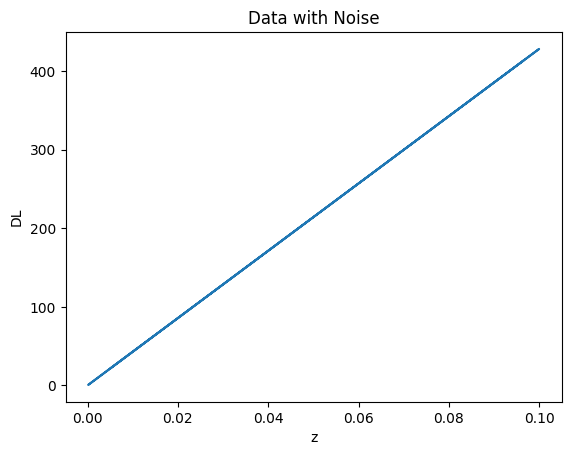

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import astropy.cosmology as cosmo
import astropy.units as unit
import astropy.constants as cons
import h5py
def dl_true_lowz(z, H0):
    return (cons.c.to(unit.km/unit.s).value*z)/H0
N = 10000 #No. of data points
zt = np.random.uniform(0.0001, 0.1, N) #True Redshift points
H0t = 70 #Injected value of True Hubble constant in km/s/Mpc
DLt = dl_true_lowz(zt, H0t) #True distance points in Mpc

DLo = np.random.normal(DLt, 0.01)
DLo = DLo[DLo>0] #Remove negative DL values, it has the potential to create bi
print(np.where(DLo<0), DLo.shape)
_ = plt.errorbar(zt, DLo, yerr=0.01)
plt.xlabel('z')
plt.ylabel('DL')
plt.title('Data with Noise');

## Showing the Error bar for the Noise induced over $D_L$

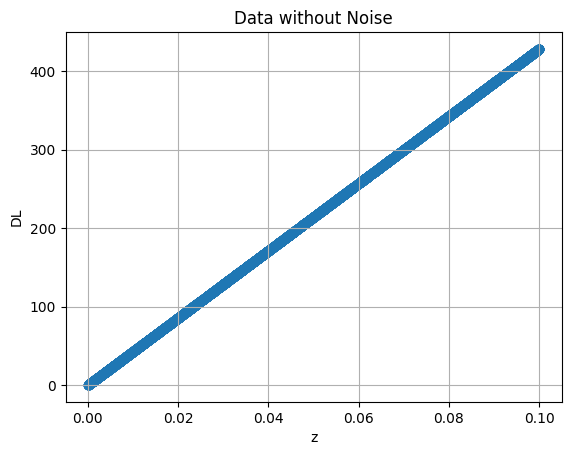

Estimated H0: 69.999985 km/s/Mpc
Error on H0: ±0.000153 km/s/Mpc


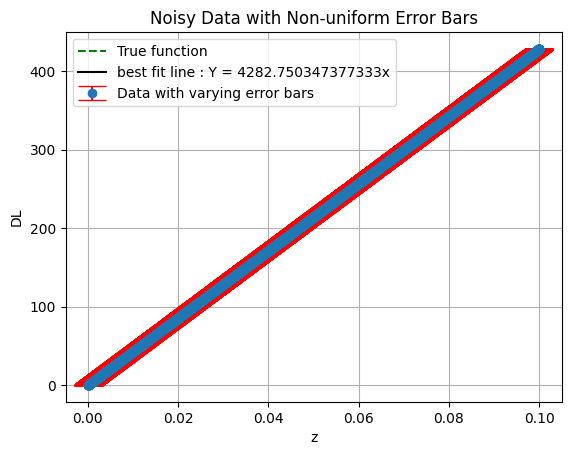

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import astropy.cosmology as cosmo
import astropy.units as unit
import astropy.constants as cons
import h5py

def dl_true_lowz(z, H0):
    return (cons.c.to(unit.km/unit.s).value*z)/H0
N = 10000 #No. of data points
zt = np.random.uniform(0.0001, 0.1, N) #True Redshift points
H0t = 70 #Injected value of True Hubble constant in km/s/Mpc
DLt = dl_true_lowz(zt, H0t) #True distance points in Mpc

plt.scatter(zt, DLt)
plt.xlabel('z')
plt.ylabel('DL')
plt.title('Data without Noise')
plt.grid()
plt.show()


#error = np.random.normal(0, 7.0, N)  # Random error values of normal dist. mean = 0 , sd = 0.01
x = zt  # X-axis values
y = np.random.normal(DLt,0.01)  # Noisy Y-axis values Dlt[i] + error [i] = y
DLo = y
#Plot with error bars
plt.errorbar(x, y, yerr=0.01, fmt='o', label='Data with varying error bars', ecolor='red', capsize=10, alpha = 1)
plt.plot(x, DLt, label='True function', linestyle='--', color='green')

plt.xlabel('z')
plt.ylabel('DL')

# Calculation for H0 || No intercept has been assumed as model = Dl \prop zt
a = np.sum((zt-np.mean(zt)) * (DLo - np.mean(DLo))) / np.sum((zt-np.mean(zt))**2)
H0 = cons.c.to(unit.km/unit.s).value / a

# Calculate error on H0
#sigma_H0 = np.mean( (cons.c.to(unit.km/unit.s).value)*np.sqrt(((zt*error)/(DLo**2))**2) ) # Not great for globally with noise || Also not applicable for wrong use of error
sigma_H01 = np.sqrt(np.mean((DLo - (a*zt))**2))
sigma_H0 = sigma_H01*np.mean(1.0/DLo)

print(f"Estimated H0: {H0:5f} km/s/Mpc")
print(f"Error on H0: ±{sigma_H0:5f} km/s/Mpc")

plt.plot(zt,(a*zt), label = f"best fit line : Y = {a}x", color = "black", alpha = 1)# change from gpt
plt.title('Noisy Data with Non-uniform Error Bars')
plt.grid()
plt.legend()
plt.show()

## Implementing the actual integral formula :
#### Luminosity Distance and Redshift Integral Formula :
The luminosity distance $( D_L )$ as a function of redshift $( z )$ in a general $FLRW$ universe is given by:

\begin{equation}
D_L(z) = (1+z) \frac{c}{H_0} \int_0^z \frac{dz'}{E(z')}
\end{equation}

for a $\Lambda CDM$ universe:

\begin{equation}
E(z) = \frac{H(z)}{H_0} = \sqrt{\Omega_m (1+z)^3 + \Omega_\Lambda}
\end{equation}

Here,


*   $( c )$ is the speed of light,
*   $( H_0 )$ is the Hubble constant,
*   $( \Omega_m )$ is the matter density parameter,
*   $( \Omega_\Lambda ) = (1 - \Omega_m ) $ is the dark energy density parameter.

z = 0.00, D_L = 0.43 Mpc
z = 0.00, D_L = 4.76 Mpc
z = 0.00, D_L = 9.09 Mpc
z = 0.00, D_L = 13.44 Mpc
z = 0.00, D_L = 17.78 Mpc


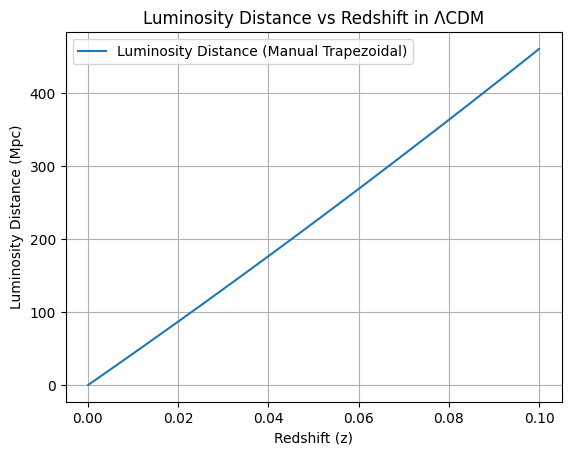

67.47530645875545


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 3e5  # Speed of light in km/s
H_0 = 70  # Hubble constant in km/s/Mpc
Omega_m = 0.3  # Matter density parameter
Omega_Lambda = 0.7  # Dark energy density parameter

# Hubble parameter as a function of redshift
def H_z(z):
    return H_0 * np.sqrt(Omega_m * (1 + z)**3 + Omega_Lambda)

# Trapezoidal integration calculation
def trapezoidal_integral(z_values, f_values):
    integral = 0.0
    for i in range(1, len(z_values)):
        delta_z = z_values[i] - z_values[i - 1]  # Step size
        trapezoid_area = (f_values[i - 1] + f_values[i]) / 2.0 * delta_z  # Trapezoid area
        integral += trapezoid_area
    return integral

# Luminosity distance calculation
def luminosity_distance(z_values):
    distances = []
    for z in z_values:
        z_integral = np.linspace(0, z, 100)  # Generate points for integration up to z
        E_inv_values = 1.0 / H_z(z_integral)  # 1 / H(z) values
        integral = trapezoidal_integral(z_integral, E_inv_values)  # Perform integration
        D_L = (1 + z) * c * integral  # Apply (1 + z) factor
        distances.append(D_L)
    return distances

# Define redshift range
redshifts = np.linspace(0.0001, 0.1, 100)  # Redshifts from 0.0001 to  0.1
distances = luminosity_distance(redshifts)

# Print some results
for z, d in zip(redshifts[:5], distances[:5]):  # Display first 5 values
    print(f"z = {z:.2f}, D_L = {d:.2f} Mpc")

# Plot the luminosity distance as a function of redshift
plt.plot(redshifts, distances, label="Luminosity Distance (Manual Trapezoidal)")
plt.xlabel("Redshift (z)")
plt.ylabel("Luminosity Distance (Mpc)")
plt.title("Luminosity Distance vs Redshift in ΛCDM")
plt.legend()
plt.grid()
plt.show()


Ho = []
Ho = (redshifts/distances)*(c)
print(np.mean(Ho))

##Bayesian Inference for Parameter Estimation :
Instead of relying on point estimates, we implement Bayesian inference to infer the parameters of the luminosity distance-redshift relation. Given observed data $( D_L^{\text{obs}} )$, we define the likelihood function:

\begin{equation}
P(D_L^{\text{obs}} | H_0, \sigma) = \prod_{i} \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\frac{(D_{L,i}^{\text{obs}} - D_L(z_i))^2}{2\sigma^2} \right)
\end{equation}

where $( \sigma )$ represents measurement uncertainties. We assume a prior distribution for $( H_0 )$ and apply Markov Chain Monte Carlo (MCMC) methods to sample from the posterior distribution:

\begin{equation}
P(H_0 | D_L^{\text{obs}}) \propto P(D_L^{\text{obs}} | H_0) P(H_0)
\end{equation}

This approach provides credible intervals for \( H_0 \), offering a probabilistic interpretation of our results.


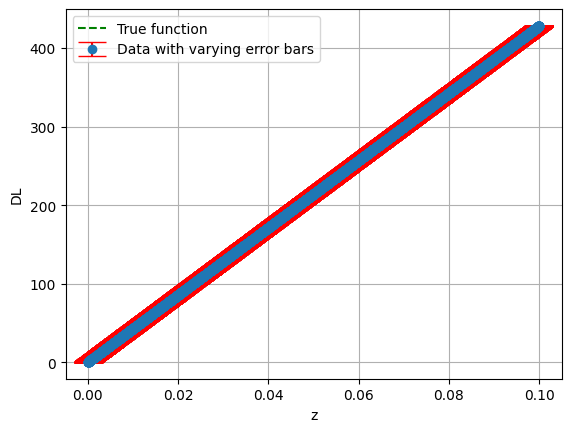

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.cosmology as cosmo
import astropy.units as unit
import astropy.constants as cons
import pymc as pm

def dl_true_lowz(z, H0):
    return (cons.c.to(unit.km/unit.s).value*z)/H0

N = 10000  # Number of data points
zt = np.random.uniform(0.0001, 0.1, N)  # True redshift points
H0t = 70  # Injected value of true Hubble constant in km/s/Mpc
DLt = dl_true_lowz(zt, H0t)  # True distance points in Mpc

# Noisy data generation
noise = 0.01
x = zt  # X-axis values
y = np.random.normal(DLt,noise)  # Noisy Y-axis values Dlt[i] + error [i] = y
DLo = y
#Plot with error bars
plt.errorbar(x, y, yerr=noise, fmt='o', label='Data with varying error bars', ecolor='red', capsize=10, alpha = 1)
plt.plot(x, DLt, label='True function', linestyle='--', color='green')

plt.xlabel('z')
plt.ylabel('DL')
plt.grid()
plt.legend()
plt.show()

In [ ]:
np.where(DLo<0)# Checking if any negative no.s present

(array([], dtype=int64),)

In [ ]:
# Bayesian modeling with PyMC - Enhanced
with pm.Model() as model:
    # Prior for H0 (Modified to avoid potential issues)
    # Using a HalfNormal prior to ensure positive values
    #  and setting a reasonable standard deviation
    H0 = pm.Uniform('H0', lower = 20, upper = 150, initval=70) # Uniform dist. as to get better coverage for likelihood

    # Prior for the slope (a), now informed by H0
    a = (cons.c.to(unit.km/unit.s).value / H0)

    # Likelihood (model) for the observed data
    likelihood = pm.Normal('y', mu=a * x, sigma=noise, observed=DLo) # Dlo = np.random.normal() . So data mathches the generation of the init. data

    # Inference: MCMC sampling with tuning and more draws
    trace = pm.sample(2000, tune=1000, target_accept=0.95) # Acceptance rate of samples |

Output()

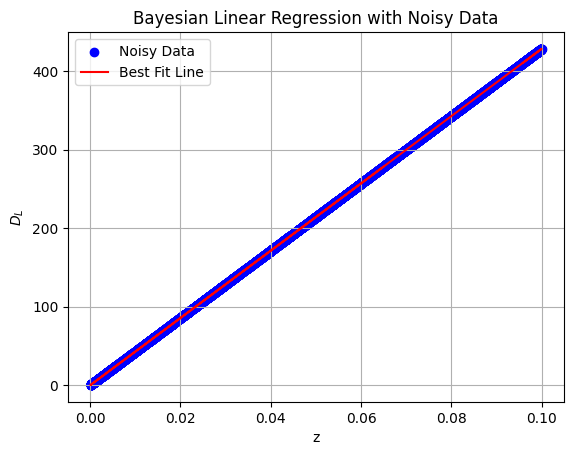

Estimated H_0: 69.999989 km/s/Mpc


In [ ]:
# Extract posterior samples for H0 and a
H0_samples = trace.posterior['H0'].values.flatten()

# Calculate posterior means for plotting
H0_post = np.mean(H0_samples)

# Plot the result
plt.scatter(x, DLo, label='Noisy Data', color='blue')
plt.plot(x, ((cons.c.to(unit.km/unit.s).value / H0_post) * x), label=f'Best Fit Line', color='red')
plt.xlabel('z')
plt.ylabel('$D_L$')
plt.title('Bayesian Linear Regression with Noisy Data')
plt.legend()
plt.grid()
plt.show()

print(f"Estimated H_0: {H0_post:5f} km/s/Mpc")

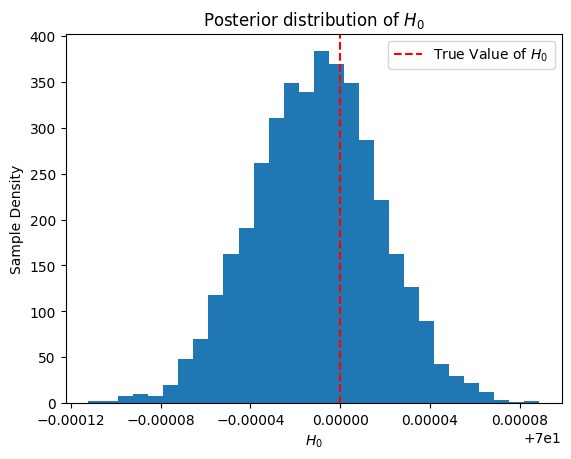

In [ ]:
import matplotlib.ticker as ticker

plt.hist(H0_samples, bins = 30);# x- axis H0 , y-axis samples
plt.axvline(H0t, color = 'r', linestyle='dashed', label= "True Value of $H_0$ ")#true value = 70
plt.title("Posterior distribution of $H_0$")
plt.xlabel("$H_0$")
plt.ylabel("Sample Density")
plt.legend()
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))


In [ ]:
np.std(H0_samples) # error bar for H0 || Posterior is covered by the whole sample. Sample covers all the moments.

2.8162352364428518e-05